# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json



# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lon and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat_lon combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# creating data fram to use in for loop

ow_data_df = pd.DataFrame()
ow_data_df["City"] = ""
ow_data_df["Cloudy"] = ""
ow_data_df["Country"] = ""
ow_data_df["Date"] = "" 
ow_data_df["Humidity"] = ""
ow_data_df["Latitude"] = ""
ow_data_df["Longitude"] = ""
ow_data_df["Max Temp"] = ""
ow_data_df["Wind Speed"] = ""

# Print out the beginning of the retrieval notificaiton
print("Beginning Weather Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array

for x in np.arange(len(cities)):
    
    print(f"Processing record {x} | {cities[x]}")
      
    try:
    
 # Request the current wheather statistics from built URL of the current city in JSON form
        response = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()
        # Place all of the variables into the created dataframe
        ow_data_df.loc[x, "City"] = response["name"]
        ow_data_df.loc[x, "Cloudy"] = response["clouds"]["all"]            
        ow_data_df.loc[x, "Country"] = response["sys"]["country"]
        ow_data_df.loc[x, "Date"] = response["dt"]
        ow_data_df.loc[x, "Humidity"] = response["main"]["humidity"]
        ow_data_df.loc[x, "Latitude"] = response["coord"]["lat"]
        ow_data_df.loc[x, "Longitude"] = response["coord"]["lon"]
        ow_data_df.loc[x, "Max Temp"] = response["main"]["temp_max"]
        ow_data_df.loc[x, "Wind Speed"] = response["wind"]["speed"]
        
        time.sleep(1.00)
        
       
    except(KeyError, IndexError):
        print("Unable to find City. Skipping to the next city")


print("Weather Data Retrieval Complete")

Beginning Weather Data Retrieval
-------------------------------
Processing record 0 | airai
Processing record 1 | ribeira grande
Processing record 2 | amderma
Unable to find City. Skipping to the next city
Processing record 3 | saint-pierre
Processing record 4 | touros
Processing record 5 | kapaa
Processing record 6 | akyab
Unable to find City. Skipping to the next city
Processing record 7 | albany
Processing record 8 | luderitz
Processing record 9 | faanui
Processing record 10 | samusu
Unable to find City. Skipping to the next city
Processing record 11 | kemin
Processing record 12 | los llanos de aridane
Processing record 13 | busselton
Processing record 14 | belushya guba
Unable to find City. Skipping to the next city
Processing record 15 | cape town
Processing record 16 | hobart
Processing record 17 | hilo
Processing record 18 | new norfolk
Processing record 19 | jamestown
Processing record 20 | sambava
Processing record 21 | port blair
Processing record 22 | hermanus
Processing re

Processing record 217 | constitucion
Processing record 218 | kindu
Processing record 219 | santa cruz del sur
Processing record 220 | khonuu
Unable to find City. Skipping to the next city
Processing record 221 | praia da vitoria
Processing record 222 | rawson
Processing record 223 | yuzhno-kurilsk
Processing record 224 | carhuaz
Processing record 225 | big spring
Processing record 226 | chase
Processing record 227 | dharchula
Processing record 228 | amboasary
Processing record 229 | talaja
Processing record 230 | san rafael
Processing record 231 | auxerre
Processing record 232 | seydisehir
Processing record 233 | quatre cocos
Processing record 234 | boguchany
Processing record 235 | vao
Processing record 236 | asyut
Processing record 237 | kegayli
Unable to find City. Skipping to the next city
Processing record 238 | harper
Processing record 239 | palmer
Processing record 240 | camacha
Processing record 241 | bethel
Processing record 242 | tura
Processing record 243 | padang
Processing

Processing record 431 | alizai
Processing record 432 | hermiston
Processing record 433 | horadiz
Processing record 434 | visegrad
Processing record 435 | antalaha
Processing record 436 | rungata
Unable to find City. Skipping to the next city
Processing record 437 | snezhnogorsk
Processing record 438 | asau
Unable to find City. Skipping to the next city
Processing record 439 | bolungarvik
Unable to find City. Skipping to the next city
Processing record 440 | ternate
Processing record 441 | limbang
Processing record 442 | nome
Processing record 443 | nabire
Processing record 444 | monte aprazivel
Processing record 445 | nikolayevskaya
Processing record 446 | yashalta
Processing record 447 | samarai
Processing record 448 | fairbanks
Processing record 449 | warri
Processing record 450 | santa isabel do rio negro
Processing record 451 | creel
Processing record 452 | beringovskiy
Processing record 453 | shimanovsk
Processing record 454 | jiangyan
Processing record 455 | karpathos
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Remove the rows with no data detected that say skipping to next city 
# to create new refined data frame: city_weather_data_df
city_weather_data_df = ow_data_df.dropna()

In [8]:
city_weather_data_df.count()

City          554
Cloudy        554
Country       554
Date          554
Humidity      554
Latitude      554
Longitude     554
Max Temp      554
Wind Speed    554
dtype: int64

In [28]:
#Save to csv file
# output_data_file = "output_data/cities.csv"
city_weather_data_df.to_csv("output_data/cities.csv")
# Display data frame for preview
city_weather_data_df.head(10)

,City,Cloudy,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Airai,51,TL,1567694355,87,-8.93,125.41,66.47,5.61
1,Ribeira Grande,40,PT,1567694357,73,38.52,-28.7,75.2,13.87
3,Saint-Pierre,90,FR,1567694358,48,48.95,4.24,69.01,16.11
4,Touros,75,BR,1567694359,66,-5.2,-35.46,84.2,13.87
5,Kapaa,20,US,1567694361,74,22.08,-159.32,82.4,14.99
7,Albany,20,US,1567694180,63,42.65,-73.75,66.99,4.7
8,Luderitz,0,NA,1567694363,59,-26.65,15.16,66.2,27.51
9,Faanui,70,PF,1567694365,83,-16.48,-151.75,76.73,23.09
11,Kemin,66,KG,1567694366,88,42.79,75.7,48.29,4.14
12,Los Llanos de Aridane,75,ES,1567694368,69,28.66,-17.92,77,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

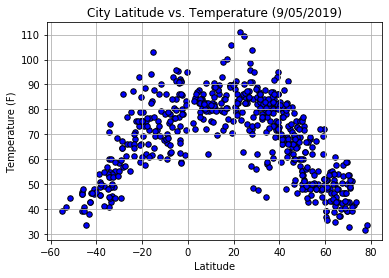

In [42]:
# Build scatter plot for Latitude versus Temperature

plt.scatter(city_weather_data_df["Latitude"],
            city_weather_data_df["Max Temp"],
            marker="o",
            color="blue",
            s=30,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Temperature (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

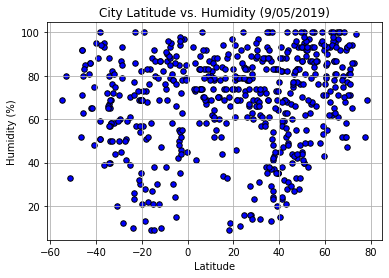

In [41]:
plt.scatter(city_weather_data_df["Latitude"],
            city_weather_data_df["Humidity"],
            marker="o",
            color="blue",
            s=30,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Humidity (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

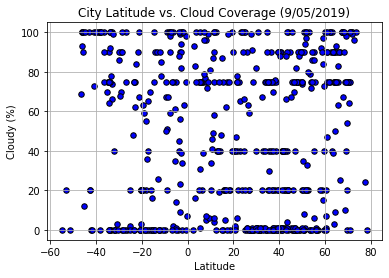

In [44]:
plt.scatter(city_weather_data_df["Latitude"],
            city_weather_data_df["Cloudy"],
            marker="o",
            color="blue",
            s=30,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Cloud Coverage (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudy (%)")
plt.grid()

plt.savefig("output_data/Lat_vs_cloudy.png")
plt.show()

#### Latitude vs. Wind Speed Plot

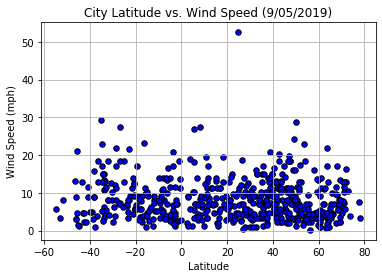

In [45]:
plt.scatter(city_weather_data_df["Latitude"],
            city_weather_data_df["Wind Speed"],
            marker="o",
            color="blue",
            s=30,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Wind Speed (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim()
plt.savefig("output_data/Lat_vs_wind_speed.png")
plt.show()